https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-100-meter-bij-100-meter-met-statistieken

download: "Statistische gegevens per vierkant 2018 (Shape)" from https://www.cbs.nl/-/media/cbs/dossiers/nederland-regionaal/vierkanten/2020-cbs_vk100_2018_v2_shape.zip and unzip in current folder.

# import packages

In [1]:
# https://pypi.org/project/rijksdriehoek/
# !pip install rijksdriehoek
# !pip install simpledbf
from rijksdriehoek import rijksdriehoek
import pandas as pd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

In [2]:
# rd = rijksdriehoek.Rijksdriehoek()
# print("Original coordinates in WGS’84: {},{}".format(str(52.3761973), str(4.8936216)))
# rd.from_wgs(52.3761973, 4.8936216)
# print("Rijksdriehoek: {},{}".format(str(rd.rd_x), str(rd.rd_y)))
# lat, lon = rd.to_wgs()
# print("WGS’84 coordinates converted from RD: {},{}".format(str(lat), str(lon)))

def WGS84toRD(North, East):
    """
    Convert WGS'84 coordinates to Rijksdriehoek x and y system per 100 meter
    """
    rd = rijksdriehoek.Rijksdriehoek()
    rd.from_wgs(North, East)
    return rd.rd_x/100, rd.rd_y/100

print(WGS84toRD(52.3676, 4.9041))

(1220.966250653319, 4867.446281807253)


# load data

In [3]:
dbf = Dbf5('CBS_VK100_2018_v2.dbf')
df = dbf.to_dataframe()
for col in df.columns:
    print(col, end=" ")

C28992R100 INWONER MAN VROUW INW_014 INW_1524 INW_2544 INW_4564 INW_65PL GEBOORTE P_NL_ACHTG P_WE_MIG_A P_NW_MIG_A AANTAL_HH TOTHH_EENP TOTHH_MPZK HH_EENOUD HH_TWEEOUD GEM_HH_GR WONING WONVOOR45 WON_4564 WON_6574 WON_7584 WON_8594 WON_9504 WON_0514 WON_1524 WON_MRGEZ P_HUURWON P_KOOPWON WON_HCORP WON_NBEW WOZWONING G_GAS_WON G_ELEK_WON UITKMINAOW AFS_SUPERM AV1_SUPERM AV3_SUPERM AV5_SUPERM AFS_DAGLMD AV1_DAGLMD AV3_DAGLMD AV5_DAGLMD AFS_WARENH AV5_WARENH AV10WARENH AV20WARENH AFS_CAFE AV1_CAFE AV3_CAFE AV5_CAFE AFS_CAFTAR AV1_CAFTAR AV3_CAFTAR AV5_CAFTAR AFS_HOTEL AV5_HOTEL AV10_HOTEL AV20_HOTEL AFS_RESTAU AV1_RESTAU AV3_RESTAU AV5_RESTAU AFS_BSO AV1_BSO AV3_BSO AV5_BSO AFS_KDV AV1_KDV AV3_KDV AV5_KDV AFS_BRANDW AFS_OPRIT AFS_TRNOVS AFS_TREINS AFS_ATTRAC AV10ATTRAC AV20ATTRAC AV50ATTRAC AFS_BIOS AV5_BIOS AV10_BIOS AV20_BIOS AFS_MUS AV5_MUS AV10_MUS AV20_MUS AFS_PODIUM AV5_PODIUM AV10PODIUM AV20PODIUM AFS_BIBLIO AF_IJSBAAN AFS_POP AFS_SAUNA AFS_ZONBNK AFS_ZWEMB AFS_ONDBAS AV1_ONDBAS AV3

In [11]:
x_lower = WGS84toRD(52.3676, 4.9041)[0] - 75
x_upper = WGS84toRD(52.3676, 4.9041)[0] + 75
y_lower = WGS84toRD(52.3676, 4.9041)[1] - 75
y_upper = WGS84toRD(52.3676, 4.9041)[1] + 75

data = df.loc[df["WOZWONING"] > 0]
coordinates = data["C28992R100"].tolist()
x = []
y = []
for coord in coordinates[:]:
    x.append(int(coord[1:5]))
    y.append(int(coord[6:11]))

data["x"] = x
data["y"] = y
data = data[["x", "y", "WOZWONING"]]
print(len(data), "original data points")
data = data.loc[(data["x"] > x_lower) & (data["x"] < x_upper)]
data = data.loc[(data["y"] > y_lower) & (data["y"] < y_upper)]
data.reset_index(drop=True, inplace=True)
print(len(data), "data points after cropping the desired area")
data

# plt.scatter(data["x"].tolist(), data["y"].tolist(), color="black", s=1)
# plt.show()

253750 original data points
6402 data points after cropping the desired area


<ipython-input-11-d7f8c4cd8846>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["x"] = x
<ipython-input-11-d7f8c4cd8846>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["y"] = y


,x,y,WOZWONING
0,1154,4942,215
1,1155,4942,207
2,1156,4942,217
3,1167,4942,193
4,1168,4942,201
...,...,...,...
6397,1265,4793,190
6398,1266,4793,234
6399,1267,4793,252
6400,1277,4793,155


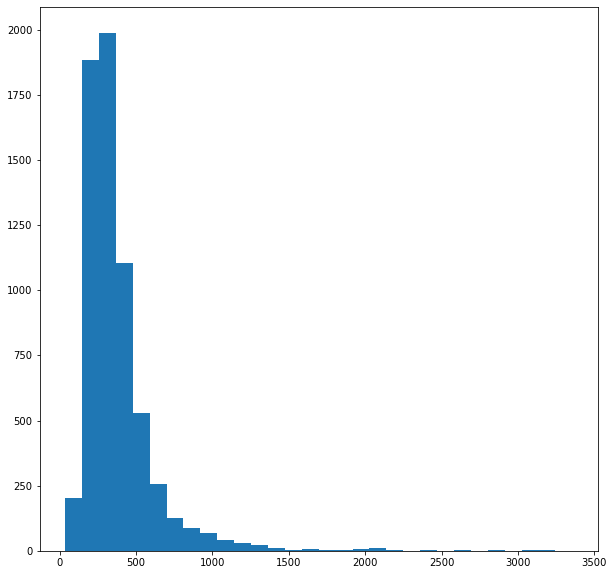

In [12]:
WOZ = data["WOZWONING"].tolist()
plt.hist(WOZ, bins=30)
plt.show()

# create np wealth matrix

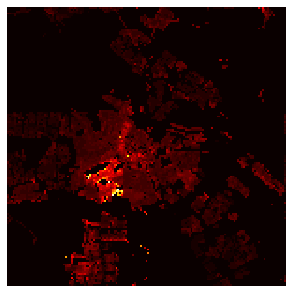

In [29]:
def normalise(wealth, max_wealth):
    current_max = np.amax(wealth)
    wealth = wealth / current_max * max_wealth
    return wealth

x_min = min(data["x"].tolist())
x_max = max(data["x"].tolist())
y_min = min(data["y"].tolist())
y_max = max(data["y"].tolist())
WOZ_min = min(data["WOZWONING"].tolist())
WOZ_max = max(data["WOZWONING"].tolist())

wealth = np.full((int(x_max-x_min), int(y_max-y_min)), 0)

for ind in data.index:
    wealth[data["x"][ind]-x_min-1][data["y"][ind]-y_min-1] = (data["WOZWONING"][ind] - WOZ_min) / (WOZ_max - WOZ_min) * wealth_max
wealth_original = np.rot90(wealth, 1)

plt.rcParams["figure.figsize"] = [5, 5]
plt.matshow(wealth_original, cmap="hot")
plt.axis("off")
plt.show()

# for gridsize in np.linspace(10, 200, 191, dtype=int):
#     for wealth_max in np.linspace(10, 50, 41, dtype=int):

#         wealth = resize(wealth_original, (gridsize, gridsize), anti_aliasing = False)
#         wealth = normalise(wealth, wealth_max).astype(int)
#         np.savetxt(f"AmsMaps/SugerMapAms{gridsize}x{gridsize}max{wealth_max}.txt", wealth, delimiter=' ')\




In [26]:
wealth_original

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [25]:
for row in wealth_original:
    print(row)

[ 0  0  0  0  0  0  0  3  3  3  0  0  0  0  0  0  0  0  0  0  3  3  5  6
  2  3  2  2  0  1  2  2  2  8  8  4  8  4  4  1  1  0  0  0  5  5  4  4
  0  6  5  6  6  6  5  7  4  4  3  4  5  6  0  0  0  0  0  0  0 16  0  0
  0  0  0  0  0  0  0  0  0  6  7  6  4  4  3  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  6  0  0  2  2  2  2  2  0  4  4  3  4
  4  0  0  0  0  0  0  0  0  0  2  0  0  0 22  5 27  7  3  7  0  0  0  0
  0  0  0  0  0]
[ 0  0  0  0  0  0  0  3  3  3  2  3  3  0  0  0  0  0  0  0  7  5  7  6
  3  3  2  2  1  1  1  2  3  5  0  4  0  5  2  1  1  0  0  0  0  0  0  0
  0  0  0  4  4  4  4  4  5  7  4  4  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 11  5  4  4  4  4  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 20 16  4  7  3  0  0  0
  0  0  0  0  0]
[ 0  0  0  0  0  5  4  3  3  3  4  4  0  0  0  0  0  0  0  0  0  9  6  7
  6  3  5  0  2  